In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Check your current directory (should be 'Notebook' folder)
print("Current dir:", os.getcwd())

# Check if the file exists in ../data/
print("Files in data folder:", os.listdir("../data"))

# Load dataset
file_path = "../data/RetailSales.csv"
df = pd.read_csv(file_path)


Current dir: c:\Users\vikra\OneDrive\Documents\Tasks\retail-sales-analysis\Notebook
Files in data folder: ['RetailSales.csv']


In [2]:
# Basic info
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())



   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

In [3]:
print(df.columns)


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


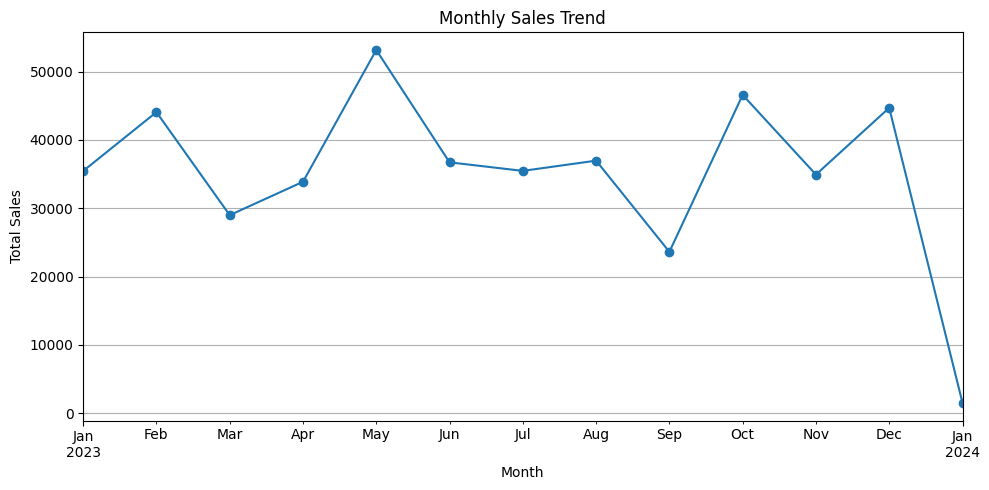

In [4]:
# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group by month and sum total amount
monthly_sales = df.groupby(df['date'].dt.to_period('M'))['total_amount'].sum()

# Plot sales trend
monthly_sales.plot(kind='line', title='Monthly Sales Trend', figsize=(10, 5), marker='o')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

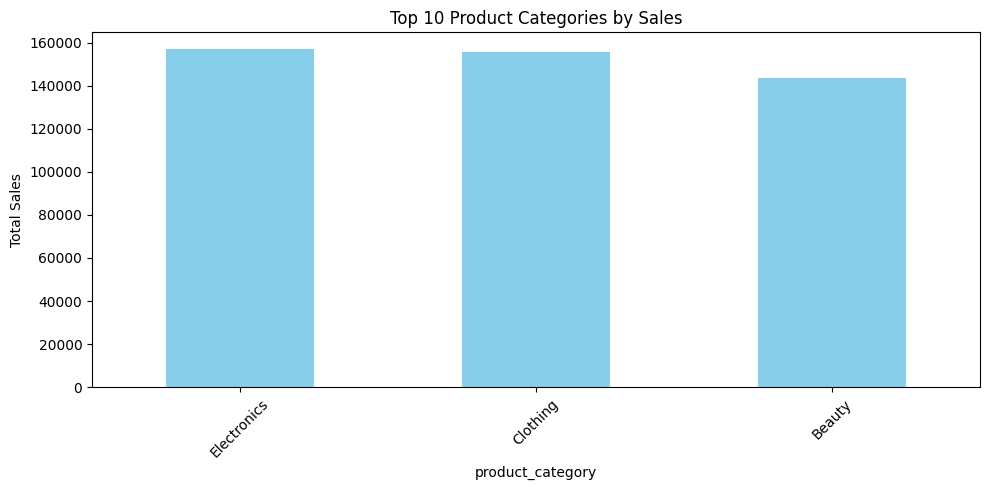

In [5]:
top_products = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', figsize=(10, 5), title='Top 10 Product Categories by Sales', color='skyblue')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



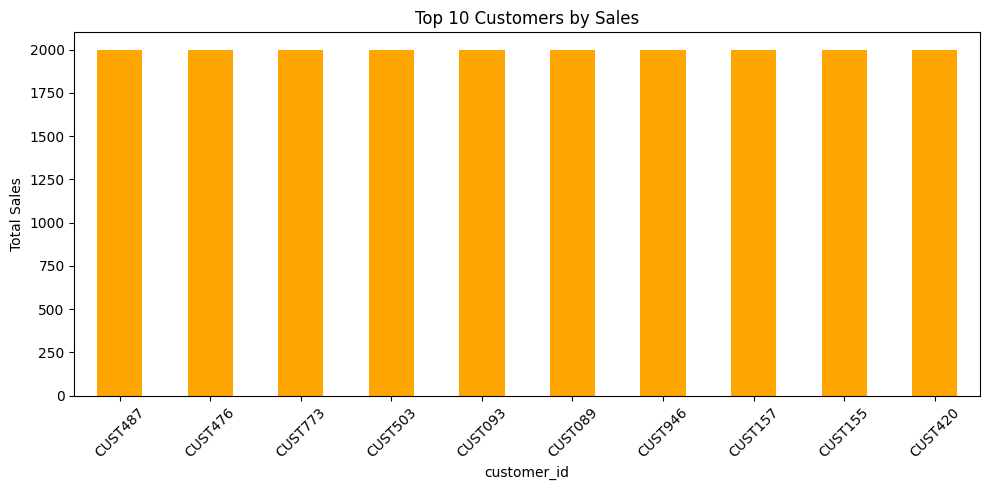

In [6]:
top_customers = df.groupby('customer_id')['total_amount'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='bar', figsize=(10, 5), title='Top 10 Customers by Sales', color='orange')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


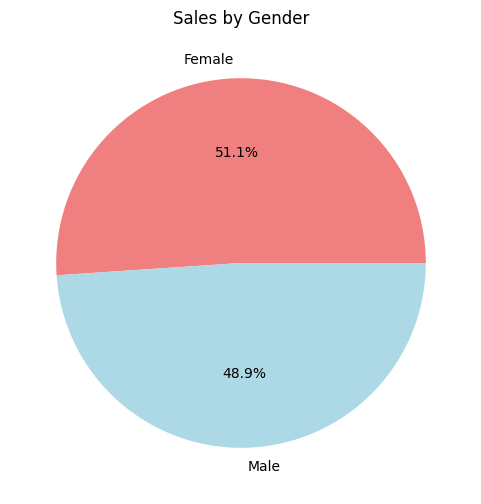

In [7]:
gender_sales = df.groupby('gender')['total_amount'].sum()

gender_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Gender', figsize=(6, 6), colors=['lightcoral', 'lightblue'])
plt.ylabel('')
plt.show()


C:\Users\vikra\AppData\Local\Temp\ipykernel_8688\2725129165.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('age_group')['total_amount'].sum()


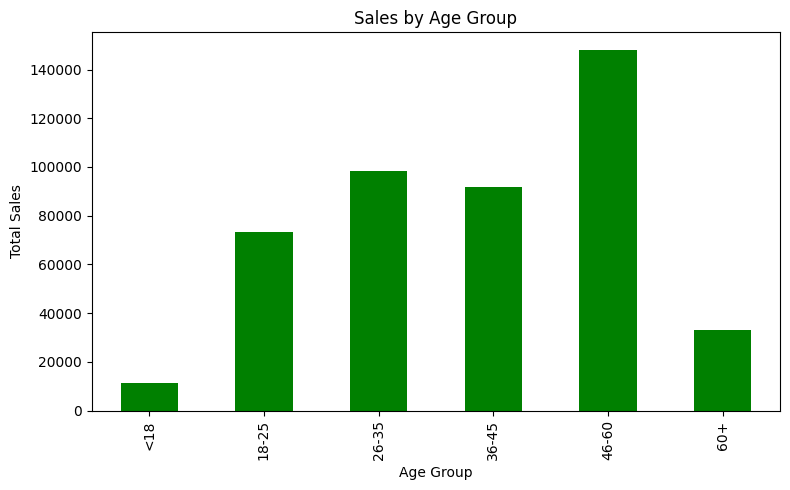

In [8]:
# Define age bins
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Group by age group
age_sales = df.groupby('age_group')['total_amount'].sum()

age_sales.plot(kind='bar', title='Sales by Age Group', figsize=(8, 5), color='green')
plt.ylabel('Total Sales')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()


Descriptive Statictics


In [9]:
# Descriptive statistics for numerical columns
desc_stats = df[['total_amount', 'quantity', 'price_per_unit', 'age']].describe()
print(desc_stats)

# Median
print("\nMedian:")
print(df[['total_amount', 'quantity', 'price_per_unit', 'age']].median())

# Mode
print("\nMode:")
print(df[['total_amount', 'quantity', 'price_per_unit', 'age']].mode().iloc[0])

# Standard deviation
print("\nStandard Deviation:")
print(df[['total_amount', 'quantity', 'price_per_unit', 'age']].std())


       total_amount     quantity  price_per_unit         age
count   1000.000000  1000.000000     1000.000000  1000.00000
mean     456.000000     2.514000      179.890000    41.39200
std      559.997632     1.132734      189.681356    13.68143
min       25.000000     1.000000       25.000000    18.00000
25%       60.000000     1.000000       30.000000    29.00000
50%      135.000000     3.000000       50.000000    42.00000
75%      900.000000     4.000000      300.000000    53.00000
max     2000.000000     4.000000      500.000000    64.00000

Median:
total_amount      135.0
quantity            3.0
price_per_unit     50.0
age                42.0
dtype: float64

Mode:
total_amount      50.0
quantity           4.0
price_per_unit    50.0
age               43.0
Name: 0, dtype: float64

Standard Deviation:
total_amount      559.997632
quantity            1.132734
price_per_unit    189.681356
age                13.681430
dtype: float64


time series analysis

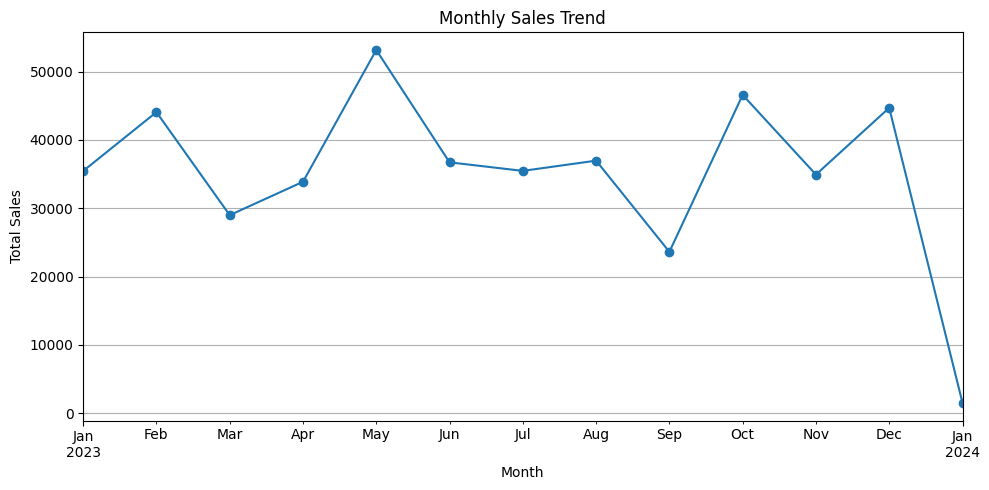

In [10]:
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by month
monthly_sales = df.groupby(df['date'].dt.to_period('M'))['total_amount'].sum()

# Plot
monthly_sales.plot(kind='line', title='Monthly Sales Trend', figsize=(10, 5), marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


customer and product analysis


In [11]:
# Sales by gender
gender_sales = df.groupby('gender')['total_amount'].sum()
print(gender_sales)

# Sales by age group
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

age_sales = df.groupby('age_group')['total_amount'].sum()
print(age_sales)


gender
Female    232840
Male      223160
Name: total_amount, dtype: int64
age_group
<18       11215
18-25     73335
26-35     98480
36-45     91870
46-60    147875
60+       33225
Name: total_amount, dtype: int64


C:\Users\vikra\AppData\Local\Temp\ipykernel_8688\1611737662.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('age_group')['total_amount'].sum()


In [12]:
# Top 5 product categories by sales
top_products = df.groupby('product_category')['total_amount'].sum().sort_values(ascending=False).head(5)
print(top_products)

# Top 5 customers by total purchases
top_customers = df.groupby('customer_id')['total_amount'].sum().sort_values(ascending=False).head(5)
print(top_customers)


product_category
Electronics    156905
Clothing       155580
Beauty         143515
Name: total_amount, dtype: int64
customer_id
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
Name: total_amount, dtype: int64


Visualization

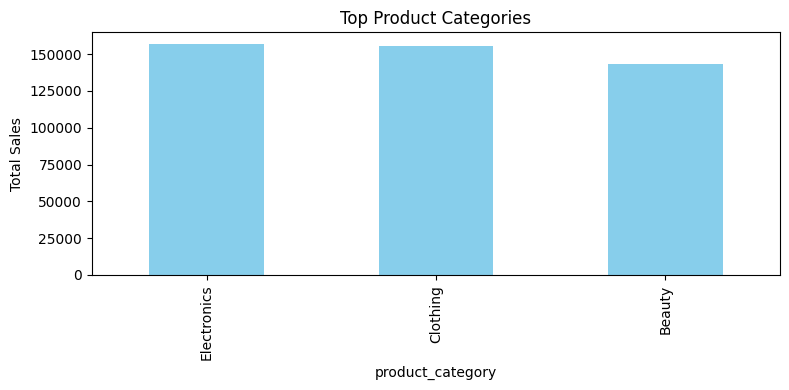

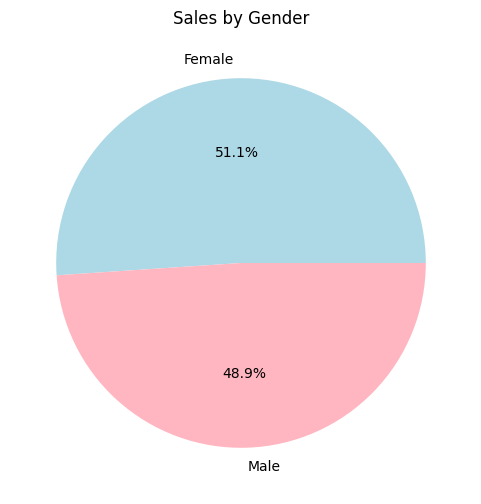

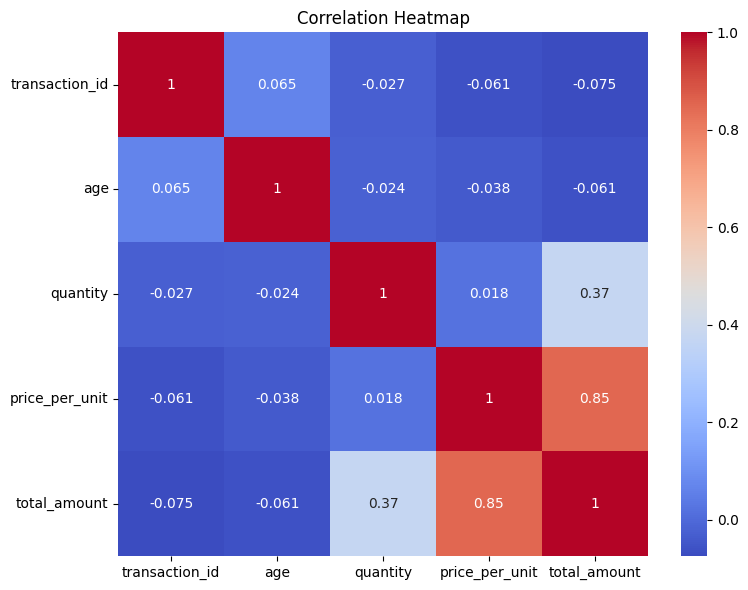

In [13]:
import seaborn as sns

# Bar chart: Top product categories
top_products.plot(kind='bar', title='Top Product Categories', ylabel='Total Sales', figsize=(8, 4), color='skyblue')
plt.tight_layout()
plt.show()

# Pie chart: Sales by gender
gender_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Gender', figsize=(6, 6), colors=['lightblue', 'lightpink'])
plt.ylabel('')
plt.show()

# Heatmap: Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
